### Import Libraries and Import Data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_injury = pd.read_csv('InjuryRecord.csv')
df_tracking = pd.read_csv('PlayerTrackData.csv')
df_plays = pd.read_csv('PlayList.csv')

### Clean PlayerTrackData.

In [3]:
in_play = ["tackle", "ball_snap", "pass_outcome_incomplete", "out_of_bounds", "first_contact", "handoff", 
           "pass_forward", "pass_outcome_caught", "touchdown", "qb_sack", "touchback", "kickoff", "punt", 
           "pass_outcome_touchdown", "pass_arrived", "extra_point", "field_goal", "play_action", "kick_received", 
           "fair_catch", "punt_downed", "run", "punt_received", "qb_kneel", "pass_outcome_interception", 
           "field_goal_missed", "fumble", "fumble_defense_recovered", "qb_spike", "extra_point_missed", 
           "fumble_offense_recovered", "pass_tipped", "lateral", "qb_strip_sack", "safety", "kickoff_land", 
           "snap_direct", "kick_recovered", "field_goal_blocked", "punt_muffed", "pass_shovel", "extra_point_blocked", 
           "pass_lateral", "punt_blocked", "run_pass_option", "free_kick", "punt_fake", "end_path", "drop_kick", 
           "field_goal_fake", "extra_point_fake", "xp_fake"]
is_kick = ["kickoff, kickoff_play", "punt", "punt_play", "free_kick", "drop_kick"]
kick_plays = df_tracking[df_tracking.event.isin(is_kick)].PlayKey.tolist()

# Add boolean column to track whether a play was injury-causing or not.
df_tracking['isInjury'] = df_tracking.PlayKey.isin(df_injury.PlayKey.tolist())
# Forward fill the event column so each row tracks the most recent event.
df_tracking['event'] = df_tracking['event'].fillna(method='ffill')
# Add boolean column to track whether the ball is in play or not.
df_tracking['inPlay'] = df_tracking.event.isin(in_play)
# Add bolean column to track whether the current play is a kickoff or punt play.
df_tracking['isKick'] = df_tracking.PlayKey.isin(kick_plays)
# Convert player speed from yd/s to mph.
df_tracking['s_mph'] = df_tracking['s'] * 2.04545


C:\Users\chris\AppData\Local\Temp\ipykernel_13932\1183363209.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tracking['event'] = df_tracking['event'].fillna(method='ffill')


### Using Groupby to calculate total distance traveled and explore player speed data.

In [4]:
df1 = df_tracking.groupby(['PlayKey']).agg({'dis':'sum','s_mph':['mean','min','max'],'isInjury':'last','isKick':'last'}).reset_index()
df1.columns = ['_'.join(col).strip() for col in df1.columns.values]
df1.rename(columns={'PlayKey_':'PlayKey'}, inplace=True)
df1

,PlayKey,dis_sum,s_mph_mean,s_mph_min,s_mph_max,isInjury_last,isKick_last
0,26624-1-1,16.83,1.095855,0.000000,6.013623,False,False
1,26624-1-10,17.07,1.178802,0.000000,6.504531,False,False
2,26624-1-11,31.20,1.627713,0.020455,6.013623,False,False
3,26624-1-12,14.70,0.715277,0.000000,3.743174,False,False
4,26624-1-13,13.26,0.873631,0.020455,3.047721,False,False
...,...,...,...,...,...,...,...
266955,47888-9-54,48.70,4.384922,0.184091,9.409070,False,False
266956,47888-9-6,83.64,4.401893,0.000000,17.181780,False,False
266957,47888-9-7,60.26,3.664050,0.000000,13.479516,False,False
266958,47888-9-8,67.35,4.405741,0.040909,14.440877,False,False


### Using plots to show how distance traveled and player speed differ on injury-causing plays.

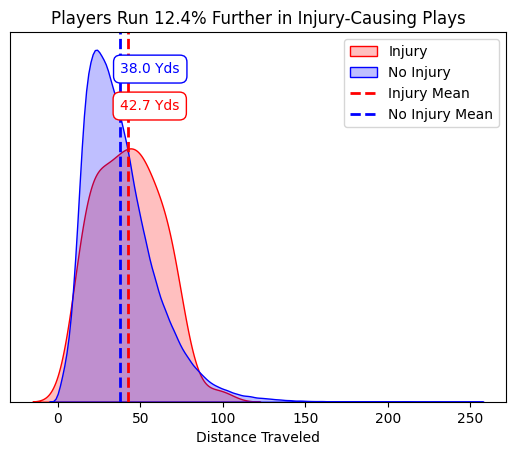

In [5]:
sns.kdeplot(df1[df1['isInjury_last'] == True]['dis_sum'], fill=True, color='red', label='Injury')
sns.kdeplot(df1[df1['isInjury_last'] == False]['dis_sum'], fill=True, color='blue', label='No Injury')

plt.axvline(df1[df1['isInjury_last'] == True]['dis_sum'].mean(), color='red', linestyle='--', linewidth=2, label='Injury Mean')
plt.axvline(df1[df1['isInjury_last'] == False]['dis_sum'].mean(), color='blue', linestyle='--', linewidth=2, label='No Injury Mean')

plt.text(df1[df1['isInjury_last'] == True]['dis_sum'].mean() + 31, plt.ylim()[1] * 0.8, str(round(df1[df1['isInjury_last'] == True]['dis_sum'].mean(),1)) + ' Yds', color='red', 
         ha='right', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
plt.text(df1[df1['isInjury_last'] == False]['dis_sum'].mean(), plt.ylim()[1] * 0.9, str(round(df1[df1['isInjury_last'] == False]['dis_sum'].mean(),1)) + ' Yds', color='blue',
         ha='left', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))

plt.xlabel('Distance Traveled')
plt.ylabel('')
plt.title('Players Run 12.4% Further in Injury-Causing Plays')
plt.legend(title='')

plt.yticks([])

plt.show()

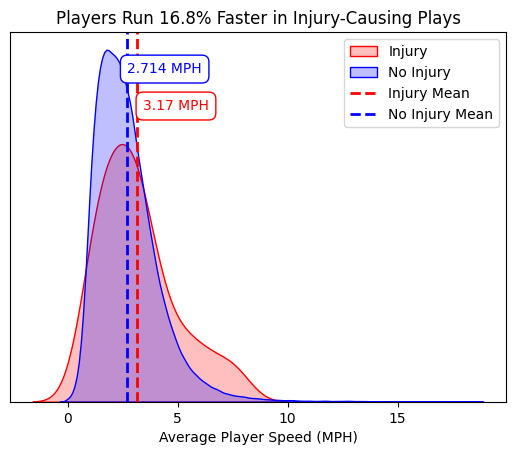

In [6]:
sns.kdeplot(df1[df1['isInjury_last'] == True]['s_mph_mean'], fill=True, color='red', label='Injury')
sns.kdeplot(df1[df1['isInjury_last'] == False]['s_mph_mean'], fill=True, color='blue', label='No Injury')

plt.axvline(df1[df1['isInjury_last'] == True]['s_mph_mean'].mean(), color='red', linestyle='--', linewidth=2, label='Injury Mean')
plt.axvline(df1[df1['isInjury_last'] == False]['s_mph_mean'].mean(), color='blue', linestyle='--', linewidth=2, label='No Injury Mean')

plt.text(df1[df1['isInjury_last'] == True]['s_mph_mean'].mean() + 3.25, plt.ylim()[1] * 0.8, str(round(df1[df1['isInjury_last'] == True]['s_mph_mean'].mean(),3)) + ' MPH', color='red', 
         ha='right', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
plt.text(df1[df1['isInjury_last'] == False]['s_mph_mean'].mean(), plt.ylim()[1] * 0.9, str(round(df1[df1['isInjury_last'] == False]['s_mph_mean'].mean(),3)) + ' MPH', color='blue',
         ha='left', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))

plt.xlabel('Average Player Speed (MPH)')
plt.ylabel('')
plt.title('Players Run 16.8% Faster in Injury-Causing Plays')
plt.legend(title='')

plt.yticks([])

plt.show()

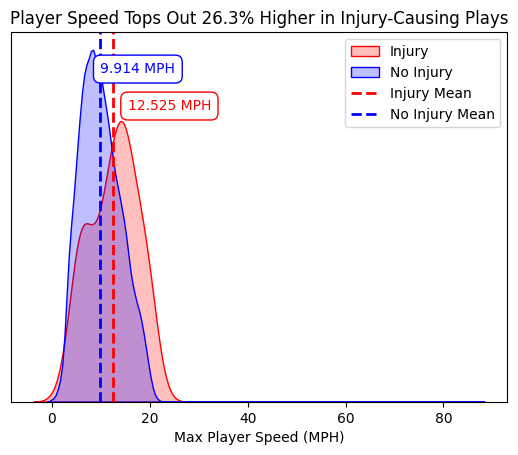

In [7]:
sns.kdeplot(df1[df1['isInjury_last'] == True]['s_mph_max'], fill=True, color='red', label='Injury')
sns.kdeplot(df1[df1['isInjury_last'] == False]['s_mph_max'], fill=True, color='blue', label='No Injury')

plt.axvline(df1[df1['isInjury_last'] == True]['s_mph_max'].mean(), color='red', linestyle='--', linewidth=2, label='Injury Mean')
plt.axvline(df1[df1['isInjury_last'] == False]['s_mph_max'].mean(), color='blue', linestyle='--', linewidth=2, label='No Injury Mean')

plt.text(df1[df1['isInjury_last'] == True]['s_mph_max'].mean() + 20, plt.ylim()[1] * 0.8, str(round(df1[df1['isInjury_last'] == True]['s_mph_max'].mean(),3)) + ' MPH', color='red', 
         ha='right', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
plt.text(df1[df1['isInjury_last'] == False]['s_mph_max'].mean(), plt.ylim()[1] * 0.9, str(round(df1[df1['isInjury_last'] == False]['s_mph_max'].mean(),3)) + ' MPH', color='blue',
         ha='left', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))

plt.xlabel('Max Player Speed (MPH)')
plt.ylabel('')
plt.title('Player Speed Tops Out 26.3% Higher in Injury-Causing Plays')
plt.legend(title='')

plt.yticks([])

plt.show()

### Exploring how player speed differs between PlayTypes.

In [14]:
df2 = pd.merge(df_plays, df1, on='PlayKey')

# Combining different Kickoff/Punt PlayTypes into one category.
df2['PlayType'] = df2['PlayType'].replace({
    'Kickoff': 'Kickoff',
    'Kickoff Returned': 'Kickoff',
    'Kickoff Not Returned': 'Kickoff',
    'Punt': 'Punt',
    'Punt Returned': 'Punt',
    'Punt Not Returned': 'Punt'
})
df2 = df2[df2.PlayType != '0']

In [23]:
avg_max_spd = df2.s_mph_max.mean()
avg_speed = df2.s_mph_mean.mean()
print('Avg Max Speed: ' + str(round(avg_max_spd,3)) + ' MPH')
print('Avg Speed: ' + str(round(avg_speed,3)) + ' MPH')

Avg Max Speed: 9.916 MPH
Avg Speed: 2.716 MPH


In [30]:
df_speeds = df2.groupby(['PlayType']).agg({'dis_sum':'mean','s_mph_mean':'mean','s_mph_max':'mean'}).reset_index()
df_speeds['Avg Speed (%Diff)'] = round((100 * (1 - (avg_speed/df_speeds['s_mph_mean']))),1)
df_speeds['Avg Max Speed (%Diff)'] = round((100 * (1 - (avg_max_spd/df_speeds['s_mph_max']))),1)
df_speeds

,PlayType,dis_sum,s_mph_mean,s_mph_max,Avg Speed (%Diff),Avg Max Speed (%Diff)
0,Extra Point,17.603432,1.838916,5.396667,-47.7,-83.7
1,Field Goal,21.483090,1.610662,5.544739,-68.6,-78.8
2,Kickoff,58.650190,5.346698,15.461459,49.2,35.9
3,Pass,40.041913,2.718189,10.217862,0.1,3.0
4,Punt,69.793448,4.596921,15.704781,40.9,36.9
5,Rush,30.177991,2.218608,8.472922,-22.4,-17.0


In [34]:
df_speeds.sort_values(by=['Avg Speed (%Diff)'], ascending=False)

,PlayType,dis_sum,s_mph_mean,s_mph_max,Avg Speed (%Diff),Avg Max Speed (%Diff)
2,Kickoff,58.650190,5.346698,15.461459,49.2,35.9
4,Punt,69.793448,4.596921,15.704781,40.9,36.9
3,Pass,40.041913,2.718189,10.217862,0.1,3.0
5,Rush,30.177991,2.218608,8.472922,-22.4,-17.0
0,Extra Point,17.603432,1.838916,5.396667,-47.7,-83.7
1,Field Goal,21.483090,1.610662,5.544739,-68.6,-78.8


### Using bar plots to show how player speeds are highest on Kickoff and Punt plays. Previous plot showed higher player speeds to be correlated with more injuries.

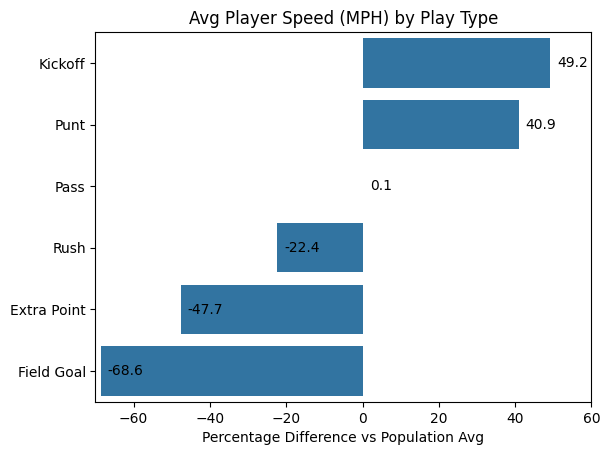

In [41]:
ax = sns.barplot(x='Avg Speed (%Diff)', y='PlayType', data=df_speeds.sort_values(by=['Avg Speed (%Diff)'], ascending=False))

plt.title('Avg Player Speed (MPH) by Play Type')
plt.xlabel('Percentage Difference vs Population Avg')
plt.ylabel('')

for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.1f'),
        (p.get_width(), p.get_y() + p.get_height() / 2.),
        ha='left', va='center',
        xytext=(5, 0),  # 5 points horizontal offset
        textcoords='offset points'
    )
ax.set_xlim(-70, 60)
plt.show()

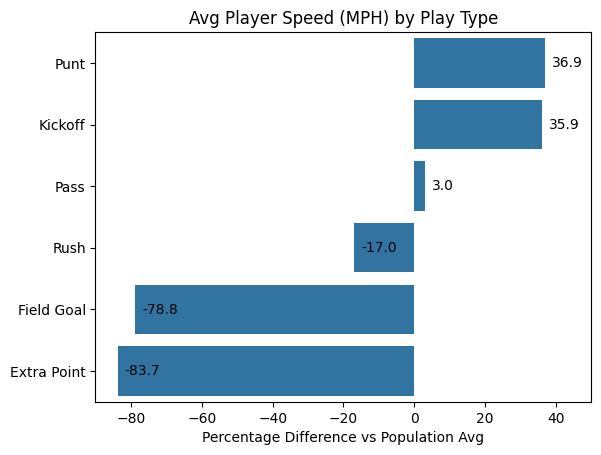

In [45]:
ax = sns.barplot(x='Avg Max Speed (%Diff)', y='PlayType', data=df_speeds.sort_values(by=['Avg Max Speed (%Diff)'], ascending=False))

plt.title('Avg Max Speed (MPH) by Play Type')
plt.xlabel('Percentage Difference vs Population Avg')
plt.ylabel('')

for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.1f'),
        (p.get_width(), p.get_y() + p.get_height() / 2.),
        ha='left', va='center',
        xytext=(5, 0),  # 5 points horizontal offset
        textcoords='offset points'
    )
ax.set_xlim(-90, 50)
plt.show()